# 近似积分
该 notebook 将要探索的是如何将函数切成矩形，从而近似其积分。

之后（在下一个notebook中），你将需要实际操作，把你之前看到的电梯加速度计数据进行集成。

## 第1部分 - 可视化矩形

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [42]:
def show_approximate_integral(f, t_min, t_max, N):
    t = np.linspace(t_min, t_max)
    plt.plot(t, f(t))
    
    delta_t = (t_max - t_min) / N
    
    print("Approximating integral for delta_t =",delta_t, "seconds")
    box_t = np.linspace(t_min, t_max, N, endpoint=False)
    box_f_of_t = f(box_t)
    plt.bar(box_t, box_f_of_t,
            width=delta_t,
            alpha=0.5,
            facecolor="orange",
            align="edge",
            edgecolor="gray")
    plt.show()

In [43]:
def f1(t):
    return -1.3 * t**3 + 5.3 * t ** 2 + 0.3 * t + 1 

Approximating integral for delta_t = 0.5 seconds


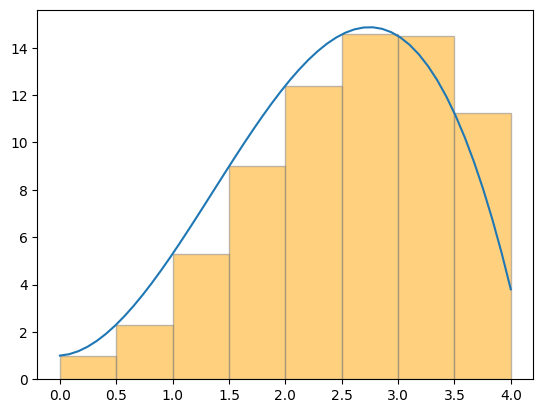

In [44]:
# TODO - increase N from 2 to 4 to 8 etc... and run
#        this cell each time. Notice how the bars 
#        get closer and closer to approximating 
#        the true area under the curve.

show_approximate_integral(f1, 0, 4, 8)

Approximating integral for delta_t = 0.08 seconds


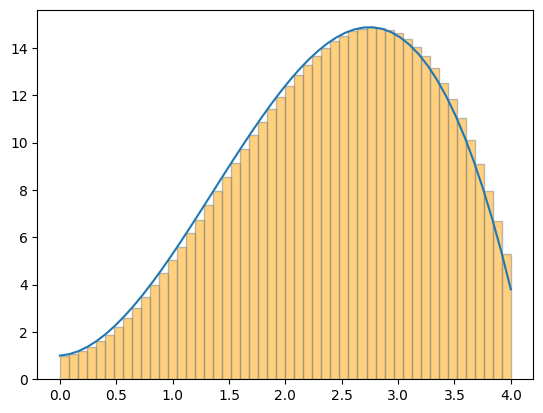

In [45]:
# When N is big, the approximation is PRETTY
# close to reality.

N = 50
show_approximate_integral(f1, 0, 4, N)

## 第2部分 - 近似积分

在本节中，你将要解决一些集成类的“作业问题”。

这些都是你在典型的微积分教科书中会看到的问题（并且**恰好**可以用巧妙的集成技术来解决）。

首先，让我们来看看你将用来执行这些近似值的函数！

In [46]:
def integral(f, t1, t2, dt=0.1):
    # area begins at 0.0 
    area = 0.0
    
    # t starts at the lower bound of integration
    t = t1
    
    # integration continues until we reach upper bound
    while t < t2:
        
        # calculate the TINY bit of area associated with
        # this particular rectangle and add to total
        dA = f(t) * dt
        area += dA
        t += dt
    return area

我会帮你解决第一个例子。
#### 作业1 - 例子

计算以下积分：

$$\int_{2}^{4}t^2dt$$

**正确答案: 18.66**

In [47]:
# solution step 1: define the function to be integrated

def f1(t):
    return t**2

In [48]:
# solution step 2: try to solve it...
integral(f1, 2, 4)

18.07000000000001

这个值很接近了，但我想让准确性更高。让我们从默认值0.1中减少dt ...

In [49]:
integral(f1,2,4,0.01)

18.766699999999705

In [50]:
integral(f1,2,4,0.001)

18.67666699999851

In [51]:
integral(f1,2,4, 0.0001)

18.666066670028115

太好了！ 在将来的计算中，我们可能应该使用dt的这个值。 在进行下一步之前，让我们看看这个积分。

Approximating integral for delta_t = 0.1 seconds


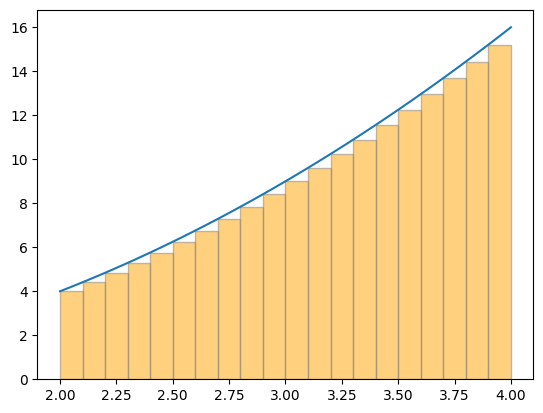

In [52]:
show_approximate_integral(f1,2,4,20)

#### 作业2

计算以下积分：

$$\int_{-2}^2 3t^3 - 4t dt$$

In [53]:
# Your code here

def f2(t):
    return 3 * t ** 3 - 4 * t
integral(f2, -2, 2, 0.0001)

-6.485876072326313e-12

[-16.0, -1.59999999999998, -0.15999999999994252, -3.505293277861199e-12, -6.485232056235857e-12]


<BarContainer object of 5 artists>

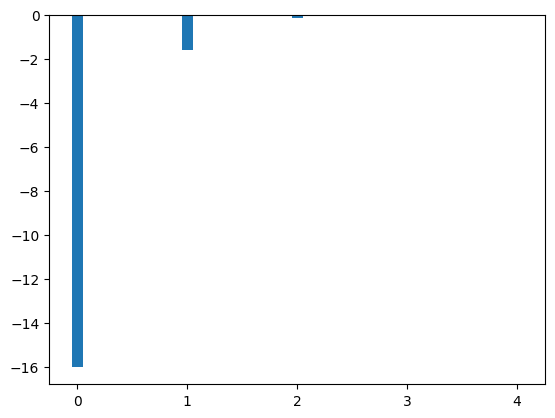

In [55]:
f2_integral = []
for i in range(0, 5):
    f2_integral.append(integral(f2, -2, 2, 0.1 ** i))
        
print(f2_integral)
# 绘制f2_integral的bar 图
plt.bar(range(0, 5), f2_integral, width=0.1)

#### 作业3（这个可能会比较有难度）
计算以下积分：

$$\int_3^{7} \frac{1}{\sqrt{2\pi\times0.2}} e^{-\frac{(t-5)^2}{2 \times 0.2}}dt$$

In [19]:
# Your code here
def f3(t):
    return np.exp(-(t-5)**2 / (2 * 0.2)) / np.sqrt(2 * np.pi * 0.2)
integral(f3, 3, 7)

0.99999564016623

-----
解决方案

In [20]:
# Solution 2
def f2(t):
    return 3 * t**3 - 4*t

integral(f2, -2, 2, 0.0001)

-6.485876072326313e-12

这个数字以“e-12”结尾，意思是 $\times 10 ^ {-12}$

这意味着这个积分是0.00000000000648（基本上为零）。这个结果应该不会让人感到意外，因为我们在一个奇函数中对称地进行了集成（t上的所有指数都是奇数）。

This means that for any positive contribution on one side of zero, there's a negative contribution to the total area on the other side of zero.也就是说，对于零的任何一方的积极贡献，对零的另一方的总面积都有负面贡献。（译者：不太理解原文）

Approximating integral for delta_t = 0.1 seconds


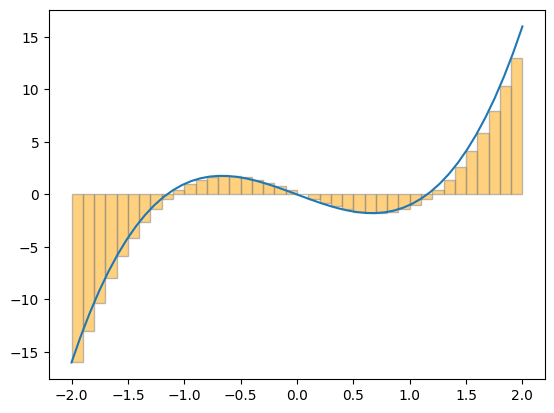

In [21]:
show_approximate_integral(f2, -2,2,40)

In [22]:
# Solution 3

from math import sqrt, pi

def f3(t):
    coeff    = 1.0 / sqrt(2 * pi * 0.2)
    exponent = -(t-5)**2 / (2*0.2)
    return coeff * np.exp(exponent)

integral(f3, 3, 7, 0.001)

0.9999922557157402

几乎接近1！ 这是因为我刚刚集成的函数是高斯概率分布。

Approximating integral for delta_t = 0.08 seconds


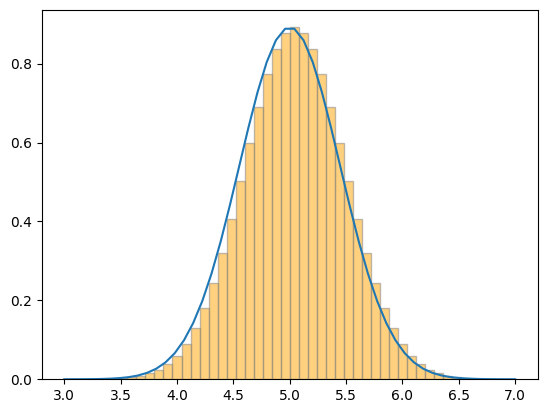

In [23]:
show_approximate_integral(f3, 3, 7, 50)